In [1]:
%pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, KFold

In [3]:
train_data = pd.read_csv('C:\\Users\\issah\\OneDrive\\Desktop\\shai-ml\\train.csv')
test_data = pd.read_csv('C:\\Users\\issah\\OneDrive\\Desktop\\shai-ml\\test.csv')

In [4]:
train_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [5]:
train_data.drop("Unnamed: 0", axis = 1, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [6]:
train_data["cut"].value_counts()

Ideal        17424
Premium      11031
Very Good     9407
Good          3910
Fair          1268
Name: cut, dtype: int64

In [7]:
train_data["color"].value_counts()

G    9080
E    7723
F    7527
H    6640
D    5555
I    4297
J    2218
Name: color, dtype: int64

In [8]:
train_data["clarity"].value_counts()

SI1     10363
VS2      9981
SI2      7380
VS1      6479
VVS2     3959
VVS1     2838
IF       1483
I1        557
Name: clarity, dtype: int64

In [9]:
train_data.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
(train_data == 0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           7
y           6
z          17
dtype: int64

In [11]:
#train data without zeros
twz = train_without_zeros = train_data.drop(index=train_data[train_data['x'] == 0][train_data['y'] == 0][train_data['z'] == 0].index, axis=0)


C:\Users\issah\AppData\Local\Temp\ipykernel_17028\476188820.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twz = train_without_zeros = train_data.drop(index=train_data[train_data['x'] == 0][train_data['y'] == 0][train_data['z'] == 0].index, axis=0)


In [12]:
(twz == 0).sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           1
y           0
z          11
dtype: int64

array([[<AxesSubplot: title={'center': 'carat'}>,
        <AxesSubplot: title={'center': 'depth'}>,
        <AxesSubplot: title={'center': 'table'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>],
       [<AxesSubplot: title={'center': 'z'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

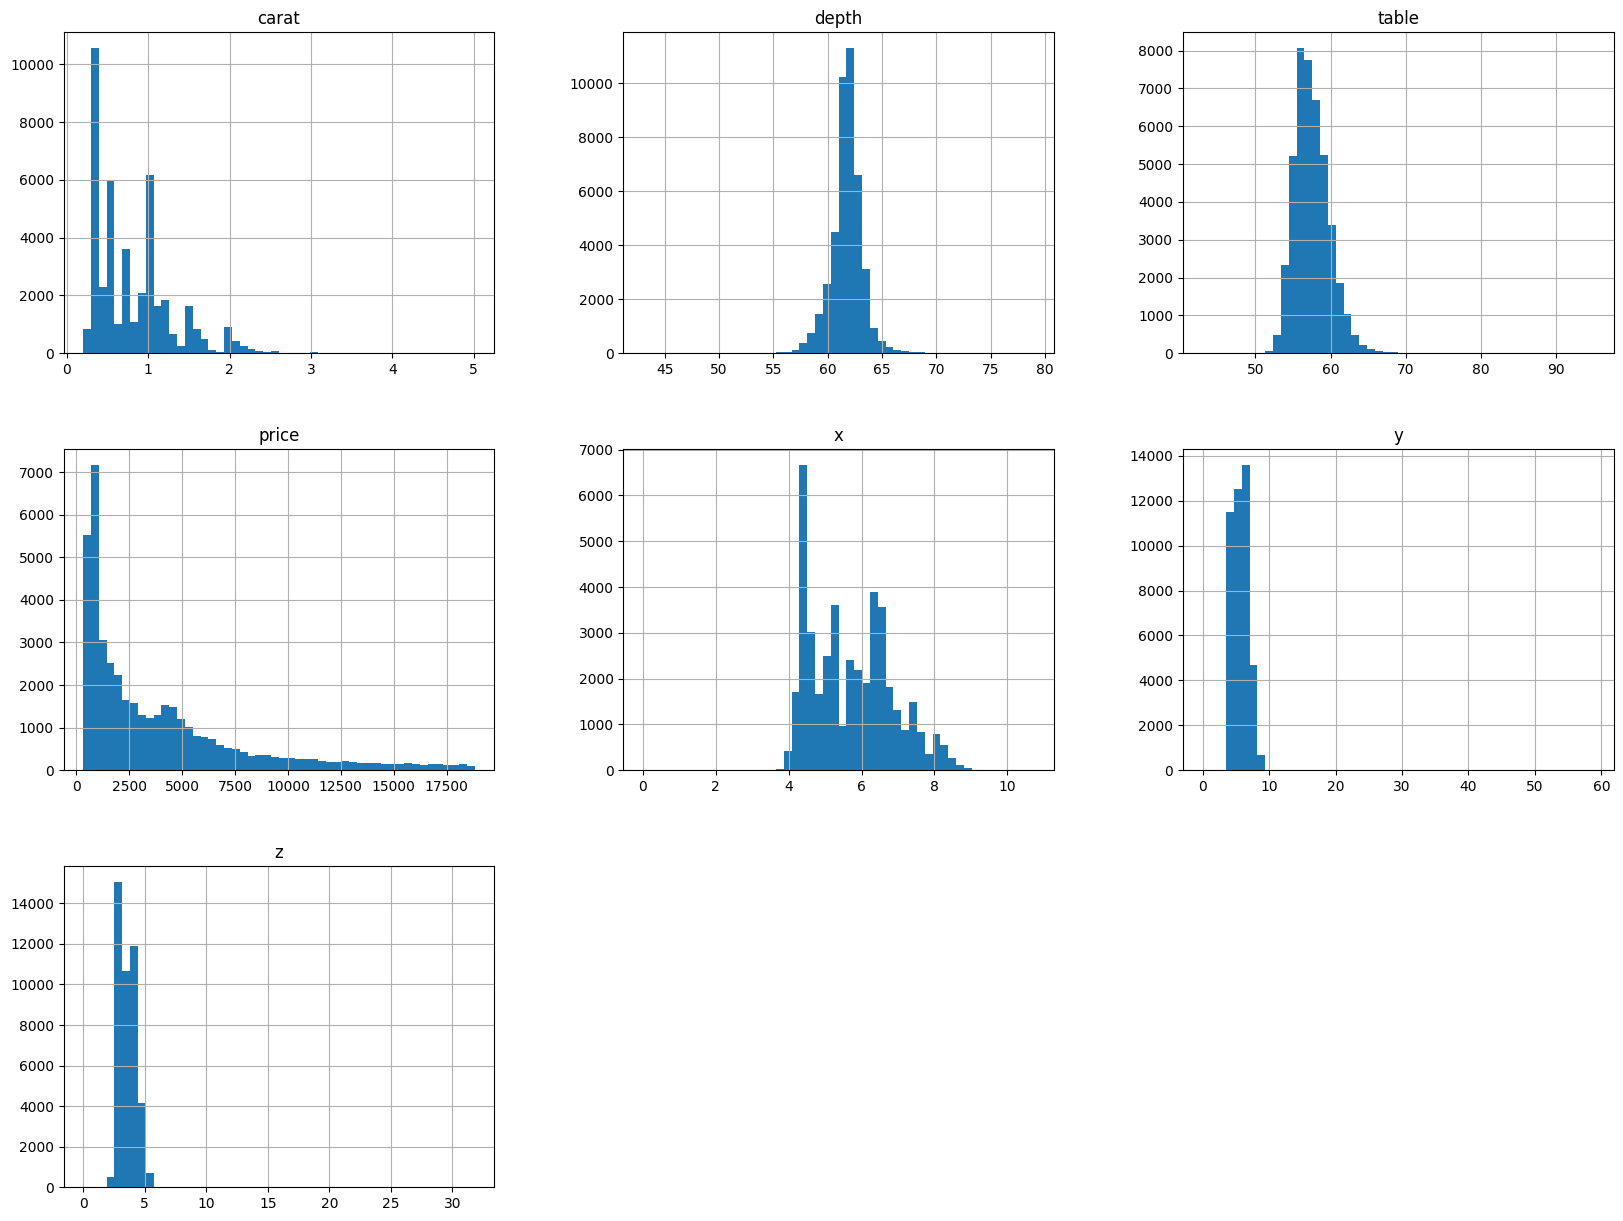

In [13]:
train_data.hist(bins=50, figsize=(20, 15))

In [14]:
data_corr = train_data.corr()
data_corr

C:\Users\issah\AppData\Local\Temp\ipykernel_17028\1339774641.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = train_data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.022599,0.191260,0.923801,0.974368,0.946001,0.948625
depth,0.022599,1.000000,-0.292084,-0.014393,-0.031088,-0.034945,0.088335
table,0.191260,-0.292084,1.000000,0.136975,0.204768,0.191469,0.159775
price,0.923801,-0.014393,0.136975,1.000000,0.887483,0.863748,0.860625
x,0.974368,-0.031088,0.204768,0.887483,1.000000,0.969541,0.966909
y,0.946001,-0.034945,0.191469,0.863748,0.969541,1.000000,0.944215
z,0.948625,0.088335,0.159775,0.860625,0.966909,0.944215,1.000000


<AxesSubplot: >

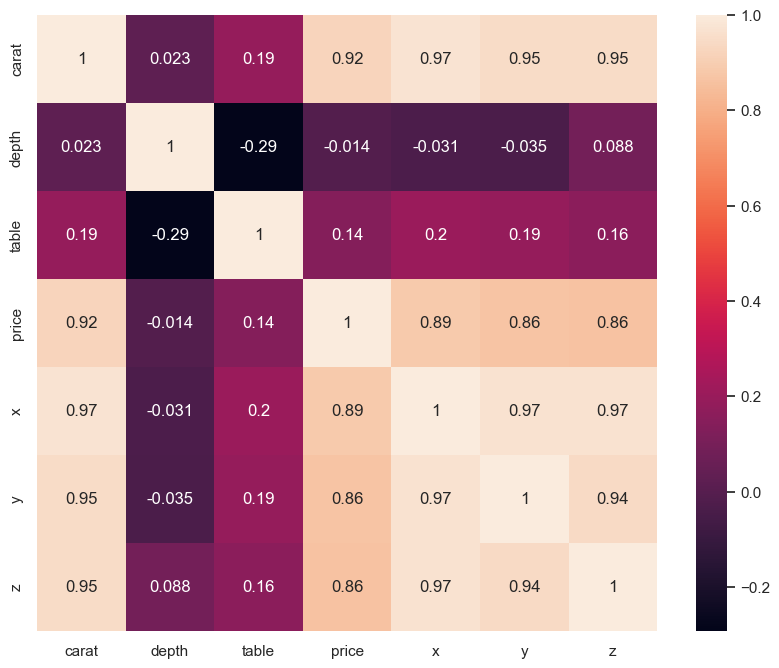

In [15]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(data_corr, annot=True)

array([[<AxesSubplot: xlabel='carat', ylabel='carat'>,
        <AxesSubplot: xlabel='depth', ylabel='carat'>,
        <AxesSubplot: xlabel='table', ylabel='carat'>,
        <AxesSubplot: xlabel='price', ylabel='carat'>,
        <AxesSubplot: xlabel='x', ylabel='carat'>,
        <AxesSubplot: xlabel='y', ylabel='carat'>,
        <AxesSubplot: xlabel='z', ylabel='carat'>],
       [<AxesSubplot: xlabel='carat', ylabel='depth'>,
        <AxesSubplot: xlabel='depth', ylabel='depth'>,
        <AxesSubplot: xlabel='table', ylabel='depth'>,
        <AxesSubplot: xlabel='price', ylabel='depth'>,
        <AxesSubplot: xlabel='x', ylabel='depth'>,
        <AxesSubplot: xlabel='y', ylabel='depth'>,
        <AxesSubplot: xlabel='z', ylabel='depth'>],
       [<AxesSubplot: xlabel='carat', ylabel='table'>,
        <AxesSubplot: xlabel='depth', ylabel='table'>,
        <AxesSubplot: xlabel='table', ylabel='table'>,
        <AxesSubplot: xlabel='price', ylabel='table'>,
        <AxesSubplot: xlabel='x'

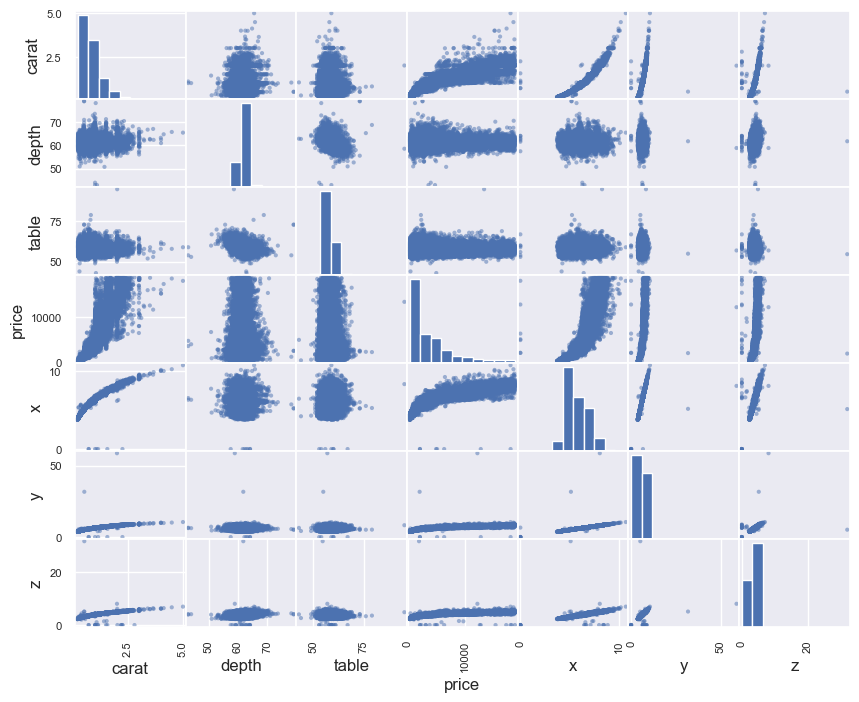

In [16]:
from pandas.plotting import scatter_matrix
num_data = train_data.drop(["cut", "color", "clarity"], axis=1)
scatter_matrix(num_data)

<AxesSubplot: xlabel='carat', ylabel='price'>

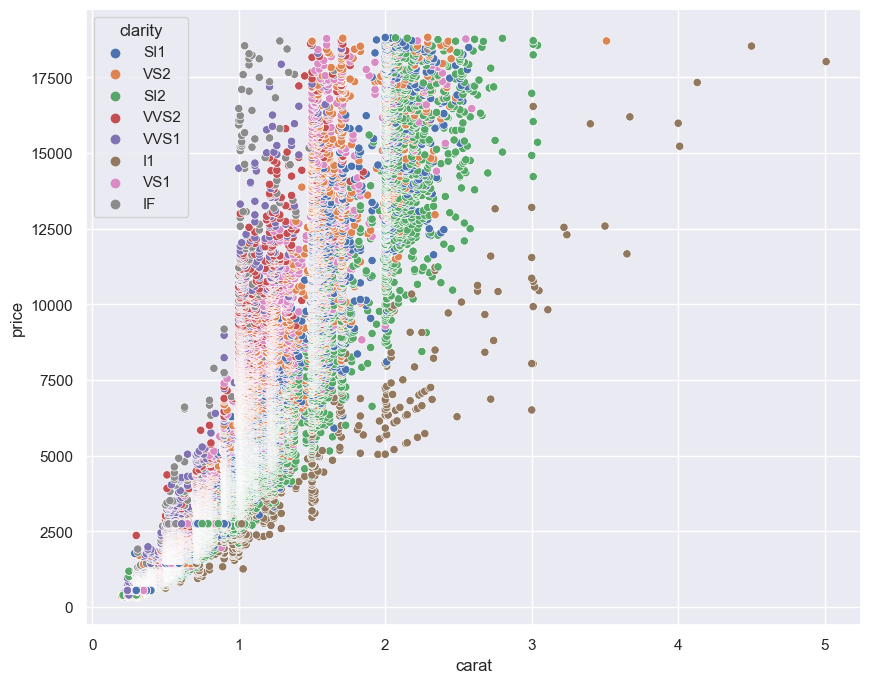

In [18]:
sns.scatterplot(data=train_data, x="carat", y="price", hue = "clarity")

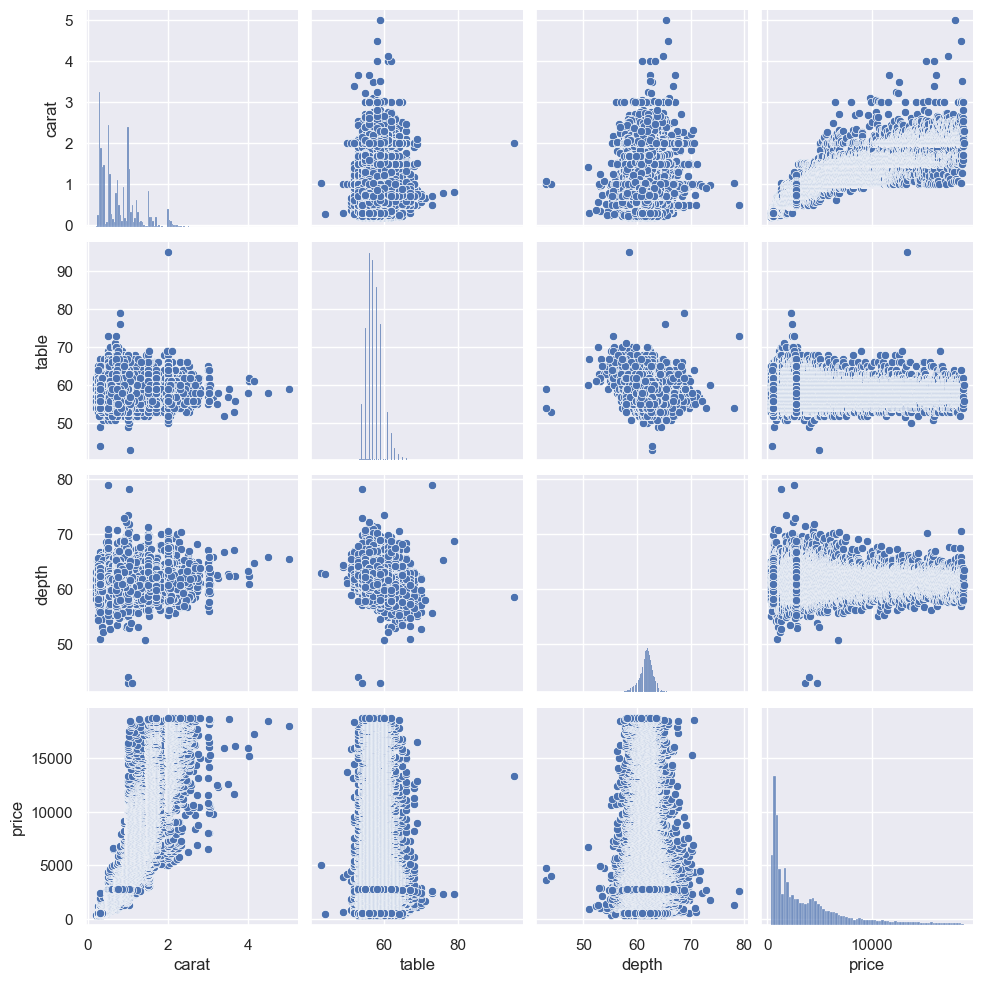

In [19]:
attributes = ["carat", "table", "depth", "price"]
sns.pairplot(data=train_data[attributes])

<AxesSubplot: xlabel='clarity', ylabel='price'>

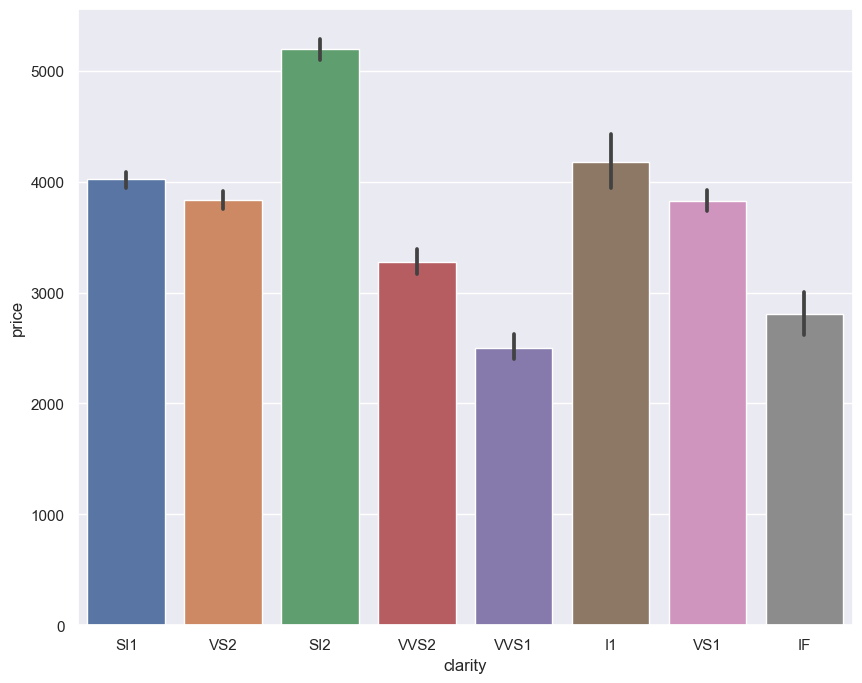

In [20]:
sns.barplot(data=train_data, x="clarity", y="price")

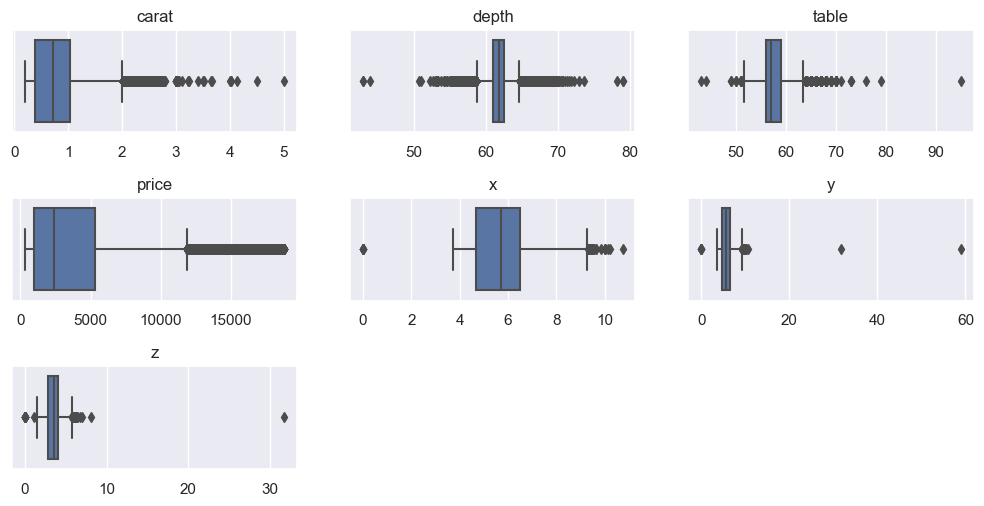

In [21]:
#outliars detection for train data
df_count = train_data.select_dtypes([int, float])
outliars_columns = []
fig = plt.figure(figsize=(10, 10))
for index, column in enumerate(df_count.columns, 1):
  ax = plt.subplot(6, 3, index)
  sns.boxplot(data = df_count, x=df_count[column])
  ax.set_xlabel(None)
  ax.set_title(f'{column}')
  outliars_columns.append(column)
  plt.tight_layout(w_pad=3)
plt.show()

In [22]:
outliars_columns

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [28]:
def get_out(data, co):
  KNN_model = KNN(co)
  KNN_model.fit(data)
  labels = KNN_model.labels_
  outliars = data.iloc[labels == 1]
  return outliars.index

In [217]:
train_diamonds = twz.copy()

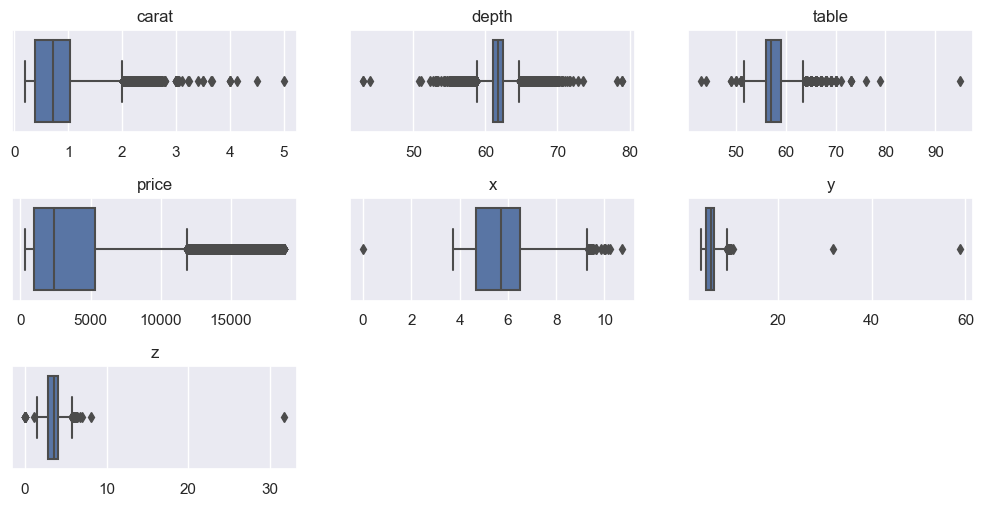

In [218]:
def box_outliars(data):
    df_count = data.select_dtypes([int, float])
    outliars_columns = []
    fig = plt.figure(figsize=(10, 10))
    for index, column in enumerate(df_count.columns, 1):
        ax = plt.subplot(6, 3, index)
        sns.boxplot(data = df_count, x=df_count[column])
        ax.set_xlabel(None)
        ax.set_title(f'{column}')
        outliars_columns.append(column)
        plt.tight_layout(w_pad=3)
    plt.show()

box_outliars(train_diamonds)

In [219]:
train_diamonds['depth'] = np.where((train_diamonds['depth']<59.9) & (train_diamonds['depth']>=57.5) ,train_diamonds['depth'].mean(),train_diamonds['depth'])
train_diamonds['depth'] = train_diamonds["depth"].drop(train_diamonds[train_diamonds['depth'] < 57.5].index, axis=0)
train_diamonds['depth'] = np.where((train_diamonds['depth']>64) & (train_diamonds['depth']<=66) ,train_diamonds['depth'].mean(),train_diamonds['depth'])
train_diamonds['depth'] = train_diamonds["depth"].drop(train_diamonds[train_diamonds['depth'] > 66].index, axis=0)
train_diamonds['carat'] = np.where((train_diamonds['carat']>2.0) & (train_diamonds['carat']<=2.4),train_diamonds['carat'].mean(), train_diamonds['carat'])
train_diamonds['carat'] = train_diamonds['carat'].drop(train_diamonds[train_diamonds['carat']>2.4].index, axis=0)
train_diamonds['table'] = train_diamonds['table'].drop(train_diamonds[train_diamonds['table']>63.5].index, axis=0, )

In [220]:
train_diamonds["depth"].min()

59.9

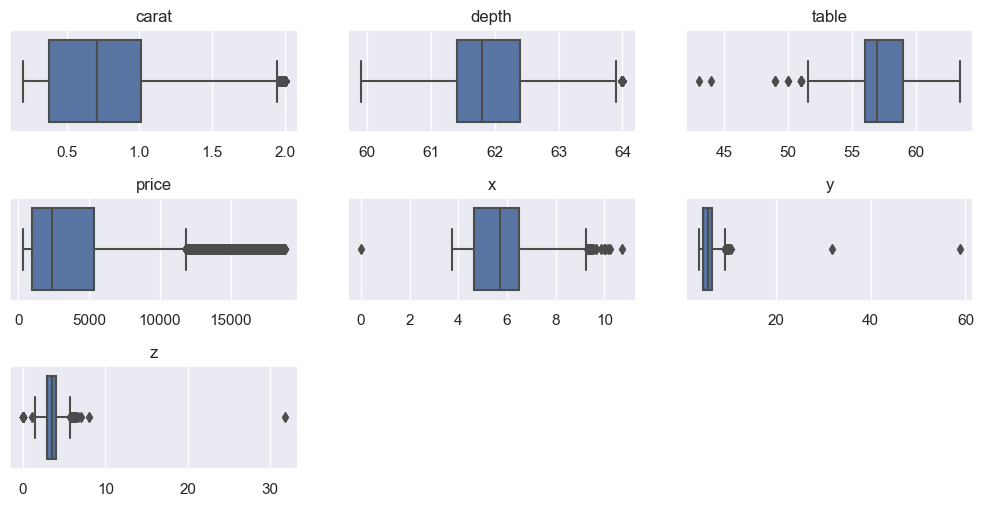

In [221]:
box_outliars(train_diamonds)

In [222]:

train_diamonds.dropna(inplace=True)


In [223]:
X_train = train_diamonds.drop("price", axis=1)
X_train

,carat,cut,color,clarity,depth,table,x,y,z
0,0.21,Premium,E,SI1,61.75,61.00,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.40,58.00,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.30,58.00,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.80,57.00,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.30,57.00,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.70,59.00,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.80,57.00,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.10,55.00,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.00,58.00,6.15,6.12,3.74


In [224]:
y_train = train_diamonds["price"]
y_train

0         326
1         334
2         335
3         336
4         336
         ... 
43035    2757
43036    2757
43037    2757
43038    2757
43039    2757
Name: price, Length: 41948, dtype: int64

In [225]:
X_test = test_data

In [226]:
num_data = X_train.drop(["cut", "color", "clarity"], axis=1)
num_attribs = list(num_data)
cat_attribs = ["clarity", "cut", "color"]

In [227]:
train_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [228]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
    ])

In [229]:
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OrdinalEncoder(), cat_attribs)])

In [230]:
data_prepared = full_pipeline.fit_transform(X_train)
data_prepared

array([[-1.34479123, -0.15746447,  1.76991332, ...,  2.        ,
         3.        ,  1.        ],
       [-1.14207453,  0.6009826 ,  0.32055732, ...,  5.        ,
         3.        ,  5.        ],
       [-1.09139535,  1.64471473,  0.32055732, ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [-0.05247223,  1.41277426, -1.12879868, ...,  2.        ,
         1.        ,  0.        ],
       [ 0.30228201, -1.02260071,  0.32055732, ...,  3.        ,
         3.        ,  4.        ],
       [ 0.02354654,  0.36904213, -1.12879868, ...,  3.        ,
         2.        ,  0.        ]])

In [231]:
X_test

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,3.95,3.98,2.43
1,3,0.23,Good,E,VS1,56.90,65.00,4.05,4.07,2.31
2,8,0.26,Very Good,H,SI1,61.90,55.00,4.07,4.11,2.53
3,10,0.23,Very Good,H,VS1,59.40,61.00,4.00,4.05,2.39
4,12,0.23,Ideal,J,VS1,62.80,56.00,3.93,3.90,2.46
...,...,...,...,...,...,...,...,...,...,...
10895,53922,0.70,Very Good,E,VS2,62.80,60.00,5.59,5.65,3.53
10896,53923,0.70,Very Good,D,VS1,63.10,59.00,5.67,5.58,3.55
10897,53933,0.70,Very Good,E,VS2,60.50,59.00,5.71,5.76,3.47
10898,53934,0.70,Very Good,E,VS2,61.20,59.00,5.69,5.72,3.49


In [232]:
some_data = full_pipeline.transform(X_train)
test_pre = full_pipeline.transform(X_test)

In [234]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_prepared, y_train)
data_prediction = lin_reg.predict(some_data)

In [235]:
from sklearn.metrics import mean_squared_error
data_prediction = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(y_train, data_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1703.4321341164318

In [264]:
scores = cross_val_score(lin_reg, data_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)
display_scores(rmse_score)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(lin_reg, data_prepared, y_train, scoring='neg_mean_absolute_error', cv=kfold, error_score='raise' )
kf_cv_scores= -kf_cv_scores
print("K-fold CV average score: %.2f +/- %.2f" % (kf_cv_scores.mean(), kf_cv_scores.std()))

scores: [1792.97840515 1798.87570718 1479.16691199 1076.45088637 4264.54252758
 2582.86232424 1273.38873628  995.68560113 1184.25643992 1612.36193553]
mean: 1806.0569475350035
std: 930.1383461714312
K-fold CV average score: 1302.18 +/- 22.65


In [236]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, y_train)

DecisionTreeRegressor()

In [237]:
pre = tree_reg.predict(some_data)
pre

array([ 326.,  334.,  335., ..., 2757., 2757., 2757.])

In [238]:
data_prediction = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(y_train, data_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.684262660071505

In [266]:
scores = cross_val_score(tree_reg, data_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)
display_scores(rmse_score)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(tree_reg, data_prepared, y_train, scoring='neg_mean_absolute_error', cv=kfold, error_score='raise' )
kf_cv_scores= -kf_cv_scores
print("K-fold CV average score: %.2f +/- %.2f" % (kf_cv_scores.mean(), kf_cv_scores.std()))

scores: [ 718.11955422  846.75060412 1065.32583977 1683.86129602 3119.00737071
 1204.41534763  292.2101718   267.38394473  321.28177455  554.09857935]
mean: 1007.2454482909561
std: 824.8337916628332
K-fold CV average score: 352.72 +/- 8.59


In [259]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_prepared, y_train)

RandomForestRegressor()

In [260]:
pre = forest_reg.predict(test_pre)
pre

array([ 421.91,  445.48,  393.19, ..., 2882.72, 2939.41, 2731.94])

In [262]:
submessions = test_data[["Unnamed: 0"]]

submessions["price"] = pre
submessions
submessions.to_csv("submession1.csv", index=None)

In [242]:
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(y_train, pre)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

205.18235659915382

In [243]:
def display_scores(scores):
    print(f"scores: {scores}")
    print(f"mean: {scores.mean()}")
    print(f"std: {scores.std()}")

In [244]:
scores = cross_val_score(forest_reg, data_prepared, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)
display_scores(rmse_score)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(forest_reg, data_prepared, y_train, scoring='neg_mean_absolute_error', cv=kfold, error_score='raise' )
kf_cv_scores= -kf_cv_scores


scores: [ 507.87249495  563.47039072  793.73254376 1230.75442997 2605.22147774
 1094.22214396  142.05777697  191.21430681  252.46017337  494.18909993]
mean: 787.5194838167846
std: 697.6772300639221


In [245]:
print("K-fold CV average score: %.2f +/- %.2f" % (kf_cv_scores.mean(), kf_cv_scores.std()))

K-fold CV average score: 264.85 +/- 7.35


**Fine-Tune**

In [246]:
from sklearn.model_selection import GridSearchCV

In [247]:
param_grid = [
{'n_estimators': [30, 100, 500], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(data_prepared, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [30, 100, 500]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [248]:
cvres = grid_search.cv_results_
for mean_score, param in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), param)

1093.877099671393 {'max_features': 2, 'n_estimators': 30}
1067.4709540655963 {'max_features': 2, 'n_estimators': 100}
1063.5394580845696 {'max_features': 2, 'n_estimators': 500}
1024.630465060367 {'max_features': 4, 'n_estimators': 30}
1010.7491164475919 {'max_features': 4, 'n_estimators': 100}
1008.305638825323 {'max_features': 4, 'n_estimators': 500}
1016.1418175404 {'max_features': 6, 'n_estimators': 30}
1026.9226422778845 {'max_features': 6, 'n_estimators': 100}
1014.4540030554851 {'max_features': 6, 'n_estimators': 500}
1045.7096059958915 {'max_features': 8, 'n_estimators': 30}
1039.520787864165 {'max_features': 8, 'n_estimators': 100}
1037.715572331335 {'max_features': 8, 'n_estimators': 500}
1297.4636799142856 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1111.7848145952037 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1208.1984284955006 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1081.1676822082075 {'bootstrap': False, 'max_features': 3

In [249]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.09650802, 0.00401907, 0.00373637, 0.24972742, 0.41673485,
       0.1397556 , 0.05642892, 0.00204332, 0.03104643])

In [250]:
final_model = grid_search.best_estimator_

In [251]:
final_model

RandomForestRegressor(max_features=4, n_estimators=500)

In [252]:
final_predictions = final_model.predict(test_pre)
# final_mse = mean_squared_error(y_train, final_predictions)
# final_rmse = np.sqrt(final_mse)
# final_rmse

In [253]:
final_predictions

array([ 431.056,  432.992,  406.418, ..., 2864.396, 2932.302, 2690.292])

In [254]:
submessions = test_data[["Unnamed: 0"]]
submessions["price"] = final_predictions
submessions
submessions.to_csv("submession2.csv", index=None)

In [255]:
# d = pd.read_csv("submession.csv")
# d.head()

In [256]:
from sklearn.model_selection import train_test_split
data = X_train
data['price'] = y_train
train_set, test_set = train_test_split(data, test_size=0.5, random_state=42)

In [257]:
test_set.drop(index=461, axis=0, inplace=True)

KeyError: '[461] not found in axis'

In [ ]:
xtr, ytr = train_set.drop("price", axis=1), train_set["price"]
xts, yts = test_set.drop("price", axis=1), train_set["price"]

In [ ]:
"""
from lazypredict.Supervised import LazyRegressor
xtr = full_pipeline.fit_transform(xtr)
xts = full_pipeline.fit_transform(xts)
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(xtr, xts, ytr, yts)
"""

'\nfrom lazypredict.Supervised import LazyRegressor\nxtr = full_pipeline.fit_transform(xtr)\nxts = full_pipeline.fit_transform(xts)\nreg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )\nmodels,predictions = reg.fit(xtr, xts, ytr, yts)\n'